# DATA PREPROCESSING

Pertama, yang harus dilakukan adalah menginstal library pycaret untuk mempermudah dala proses penghapusan outlier. Selain pycaret, kalian juga bisa menginstal library pyod. library ini fungsi nya hampir sama dengan pycaret, hanya saja code yang menggunakan pycaret akan olebih rigkas. 

In [1]:
pip install pycaret

^C


     -------------------------------------- 486.1/486.1 KB 3.4 MB/s eta 0:00:00
     -------------------------------------- 139.8/139.8 KB 8.6 MB/s eta 0:00:00
     -------------------------------------- 615.0/615.0 KB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.3 MB/s eta 0:00:00
     -------------------------------------- 282.6/282.6 KB 8.8 MB/s eta 0:00:00
     ---------------------------------------- 10.8/10.8 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 KB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 82.7/82.7 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 21.8/21.8 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 200.6/200.6 KB 2.4 MB/s eta 0:00:00
     -------------------------------------- 258.3/258.3 KB 2.0 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 KB 2.7 MB/s eta 0:00:00
     ------------------------------------

Note: you may need to restart the kernel to use updated packages.


### Pembacaan Data dari Data Understanding

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("IRIS.csv")

if 'Class' in df.columns:
    le = LabelEncoder()
    df['Class'] = le.fit_transform(df['Class'])

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df[numerical_features]


### Setup pycaret untuk Anomaly Detection

In [ ]:
from pycaret.anomaly import setup

exp_ano = setup(
    data=X,
    normalize=True,   
    session_id=123   


,Description,Value
0,Session id,123
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


### Deteksi Outlier dengan Metode ABOD (Angle-Based Outlier Detection)

Pada bagian ini, saya akan menggunakan metode ABOD untuk mencari outlier pada dataset Iris. ABOD bekerja dengan melihat sudut antara titik-titik data. Data yang jauh dari kelompok utama atau “sendiri” akan punya pola sudut berbeda dibanding data normal. Metode ini memperhitungkan hubungan antar fitur, jadi cocok untuk dataset dengan banyak kolom (multidimensi). 

Di kode, akan dibuat model ABOD dengan create_model('abod'), lalu menambahkan hasil deteksi ke dataset asli dengan assign_model(). Kemudian akan muncul kolom baru Anomaly, di mana 0 artinya data normal dan 1 artinya data outlier. Dataset kemudian dipisah menjadi dua bagian: data normal dan data outlier, supaya dapat menganalisis keduanya dengan lebih mudah. Hasil ini akan membantu untuk melihat sebaran outlier dan mempersiapkan data agar lebih bersih sebelum digunakan untuk tahap preprocessing atau pembuatan model, sehingga hasil model nanti lebih baik dan tidak terpengaruh data ekstrem.

In [ ]:
from pycaret.anomaly import create_model, assign_model

abod_model = create_model('abod')

abod_results = assign_model(abod_model)

abod_normal = abod_results[abod_results['Anomaly'] == 0]
abod_outlier = abod_results[abod_results['Anomaly'] == 1]

print("ABOD Outlier Count:", len(abod_outlier))
display(abod_results.head())


ABOD Outlier Count: 8


,sepal_length,sepal_width,petal_length,petal_width,Anomaly,Anomaly_Score
0,5.1,3.5,1.4,0.2,0,-196.653411
1,4.9,3.0,1.4,0.2,0,-94.957084
2,4.7,3.2,1.3,0.2,0,-59.887881
3,4.6,3.1,1.5,0.2,0,-75.114571
4,5.0,3.6,1.4,0.2,0,-35.818025


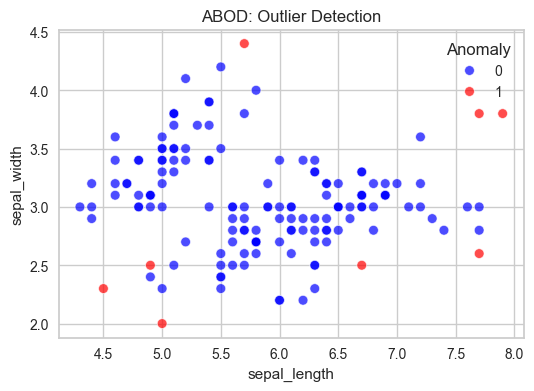

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=abod_results,
    x=numerical_features[0], 
    y=numerical_features[1],
    hue='Anomaly',
    palette={0:'blue', 1:'red'},
    alpha=0.7
)
plt.title("ABOD: Outlier Detection")
plt.show()


### Deteksi Outlier dengan Metode KNN (K-Nearest Neighbors)

Di bagian ini, saya akan menggunakan metode KNN untuk mendeteksi outlier pada dataset Iris. KNN menilai setiap titik data berdasarkan jarak ke tetangga terdekatnya, sehingga data yang jauh dari titik-titik lain dianggap outlier. Dengan kode create_model('knn') dan assign_model(), kolom Anomaly ditambahkan ke dataset, di mana 0 menandakan data normal dan 1 menandakan outlier. Dataset kemudian dipisah menjadi data normal dan outlier, sehingga bisa menganalisis jumlah outlier dan data normal secara terpisah, serta memastikan data ekstrem tidak memengaruhi analisis atau pemodelan berikutnya.

In [ ]:
knn_model = create_model('knn')
knn_results = assign_model(knn_model)

knn_normal = knn_results[knn_results['Anomaly'] == 0]
knn_outlier = knn_results[knn_results['Anomaly'] == 1]

print("KNN Outlier Count:", len(knn_outlier))
display(knn_results.head())


KNN Outlier Count: 8


,sepal_length,sepal_width,petal_length,petal_width,Anomaly,Anomaly_Score
0,5.1,3.5,1.4,0.2,0,0.261206
1,4.9,3.0,1.4,0.2,0,0.272151
2,4.7,3.2,1.3,0.2,0,0.363503
3,4.6,3.1,1.5,0.2,0,0.353848
4,5.0,3.6,1.4,0.2,0,0.374971


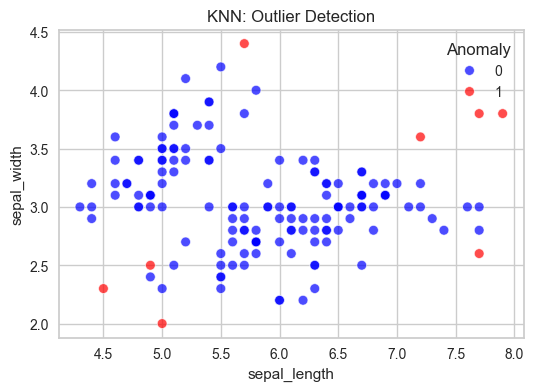

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=knn_results,
    x=numerical_features[0], 
    y=numerical_features[1],
    hue='Anomaly',
    palette={0:'blue', 1:'red'},
    alpha=0.7
)
plt.title("KNN: Outlier Detection")
plt.show()


### Deteksi Outlier dengan Metode LOF (Local Outlier Factor)

Di bagian ini, saya akan menggunakan metode LOF untuk mendeteksi outlier pada dataset Iris. LOF menilai setiap titik data berdasarkan kepadatan lokal dibandingkan tetangganya, sehingga data yang memiliki kepadatan berbeda dari sekitarnya dianggap outlier. Dengan kode create_model('lof') dan assign_model(), kolom Anomaly ditambahkan ke dataset, di mana 0 menunjukkan data normal dan 1 menunjukkan outlier. Dataset kemudian dipisah menjadi data normal dan outlier, sehingga bisa melihat jumlah outlier dan menganalisis data normal dengan lebih jelas, serta memastikan data ekstrem tidak memengaruhi tahap analisis atau pemodelan berikutnya.

In [ ]:
lof_model = create_model('lof')
lof_results = assign_model(lof_model)

lof_normal = lof_results[lof_results['Anomaly'] == 0]
lof_outlier = lof_results[lof_results['Anomaly'] == 1]

print("LOF Outlier Count:", len(lof_outlier))
display(lof_results.head())


LOF Outlier Count: 8


,sepal_length,sepal_width,petal_length,petal_width,Anomaly,Anomaly_Score
0,5.1,3.5,1.4,0.2,0,0.987666
1,4.9,3.0,1.4,0.2,0,1.070277
2,4.7,3.2,1.3,0.2,0,0.995533
3,4.6,3.1,1.5,0.2,0,1.048324
4,5.0,3.6,1.4,0.2,0,1.006263


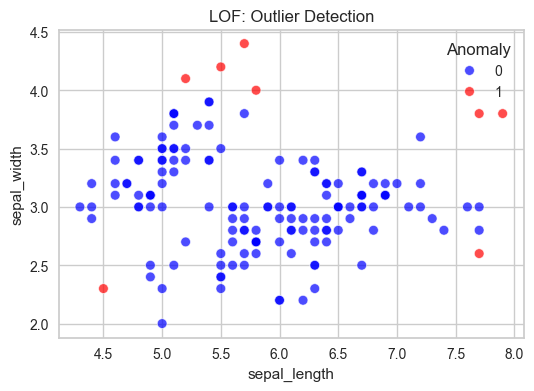

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=lof_results,
    x=numerical_features[0], 
    y=numerical_features[1],
    hue='Anomaly',
    palette={0:'blue', 1:'red'},
    alpha=0.7
)
plt.title("LOF: Outlier Detection")
plt.show()


### Bar Plot Jumlah Outlier per Metode

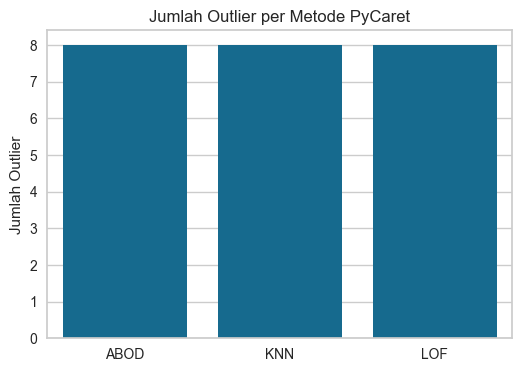

In [14]:
outlier_counts = {
    'ABOD': len(abod_outlier),
    'KNN': len(knn_outlier),
    'LOF': len(lof_outlier)
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
plt.title("Jumlah Outlier per Metode PyCaret")
plt.ylabel("Jumlah Outlier")
plt.show()


### Kesimpulan

Dari hasil analisis dataset Iris, dapat dimenemukan bahwa terdapat beberapa baris data yang termasuk outlier, yaitu data yang berbeda jauh dari kelompok utama. Metode ABOD, KNN, dan LOF masing-masing mendeteksi outlier dengan cara berbeda: ABOD berdasarkan variansi sudut antar titik, KNN berdasarkan jarak ke tetangga terdekat, dan LOF berdasarkan kepadatan lokal. Visualisasi scatter plot memperlihatkan bahwa outlier cenderung tersebar di beberapa kombinasi fitur, terutama pada fitur petal length dan sepal length, dan jumlah outlier berbeda-beda tergantung metode yang digunakan.

Deteksi outlier ini penting karena data ekstrem dapat memengaruhi analisis atau performa model yang akan dibangun. Dengan memisahkan data normal dan outlier, kita bisa melakukan preprocessing lebih baik dan menjaga kualitas dataset sebelum digunakan untuk pemodelan lebih lanjut. Hal ini memastikan bahwa model yang dibangun tidak terpengaruh oleh data yang ekstrem, sehingga hasil analisis lebih akurat dan andal.